In [55]:
import pandas as pd

file_path = '/content/sample_data/Human_Development_Index_Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')
print(df.head())


   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary_education_m_%  seats_in_

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#1. Extract Latest Year:
#• Identify unique years in the dataset.
#• Filter the dataset to include only observations from the year 2022.
#• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


years = df['year'].unique()
print(years)

df_2022 = df[df['year'] == 2022]
df_2022.head()


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [58]:
#2. Data Exploration:
#• Display the first 10 rows of the 2022 dataset.
#• Count the number of rows and columns.
#• List all column names and their data types.

df_2022.head(10)
df_2022.shape
df_2022.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

In [59]:
'''
3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).'''

df_2022.isnull().sum()

df_2022.dtypes

sorted(df_2022['country'].unique())

df_2022.duplicated().sum()

(df_2022 == "–").sum()


df_2022 = df_2022.copy()

for col in df_2022.columns:
    if col not in ['country', 'iso3']:
        df_2022[col] = pd.to_numeric(df_2022[col], errors='coerce')


df_2022 = df_2022.drop_duplicates()

df_2022 = df_2022.dropna(subset=['hdi'])


In [60]:
df_2022.info()


<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 204 non-null    int64  
 1   iso3                       204 non-null    object 
 2   country                    204 non-null    object 
 3   year                       204 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            204 non-null    float64
 6   pop_millions               204 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               204 non-null    float64
 10  life_expec_m               204 non-null    float64
 11  expec_yr_school            204 non-null    float64
 12  expec_yr_school_f          204 non-null    float64
 13  expec_yr_school_m          204 non-null    float64
 1

In [61]:
'''
4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.'''

mean_hdi = df_2022['hdi'].mean()
median_hdi = df_2022['hdi'].median()
std_hdi = df_2022['hdi'].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [62]:
top_hdi = df_2022.loc[df_2022['hdi'].idxmax(), ['country', 'hdi']]
top_hdi


,5609
country,Switzerland
hdi,0.967


In [63]:
low_hdi = df_2022.loc[df_2022['hdi'].idxmin(), ['country', 'hdi']]
low_hdi


,5345
country,Somalia
hdi,0.38


In [64]:
'''
5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.
'''

high_df = df_2022[df_2022['hdi'] > 0.800]

high_df = high_df.sort_values('gross_inc_percap', ascending=False)

high_df[['country', 'hdi', 'gross_inc_percap']].head(10)


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


In [65]:
'''
6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):
HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.
'''

def hdi_cat(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi <= 0.699:
        return 'Medium'
    elif hdi <= 0.799:
        return 'High'
    else:
        return 'Very High'


df_2022['HDI_Category'] = df_2022['hdi'].apply(hdi_cat)

df_2022[['country', 'hdi', 'HDI_Category']].head(10)

df_2022['HDI_Category'].value_counts()

df_2022.to_csv('HDI_category_added.csv', index=False)


In [66]:
'''Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.
'''

df_2020_22 = df[df['year'].isin([2020, 2021, 2022])].copy()

df_2020_22['year'].unique()

df_2020_22.to_csv('HDI_problem1B.csv', index=False)


In [67]:
'''
Check for missing values in the following essential columns:
– hdi
– country
– year'''
df_2020_22[['hdi', 'country', 'year']].isnull().sum()


,0
hdi,8
country,0
year,0


In [68]:
'''Identify and address the following issues:
– missing or null values,'''
df_2020_22 = df_2020_22.dropna(subset=['hdi'])


In [69]:
df_2020_22[['hdi', 'country', 'year']].isnull().sum()


,0
hdi,0
country,0
year,0


In [70]:
'''– inconsistent or misspelled country names,'''

sorted(df_2020_22['country'].unique())


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab States',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia and the Pacific',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini (Kingdom of)',
 'Ethiopia',
 'Europe and Central Asia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 '

In [71]:
'''– duplicate rows,'''

df_2020_22.duplicated().sum()


np.int64(0)

In [72]:
'''– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).'''
for col in df_2020_22.columns:
    if col not in ['country', 'iso3']:
        df_2020_22[col] = pd.to_numeric(df_2020_22[col], errors='coerce')


In [73]:
df_2020_22.info()
df_2020_22.head()  # checking the values


<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 610 non-null    int64  
 1   iso3                       610 non-null    object 
 2   country                    610 non-null    object 
 3   year                       610 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            610 non-null    float64
 6   pop_millions               610 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               610 non-null    float64
 10  life_expec_m               610 non-null    float64
 11  expec_yr_school            610 non-null    float64
 12  expec_yr_school_f          610 non-null    float64
 13  expec_yr_school_m          610 non-null    float64
 1

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


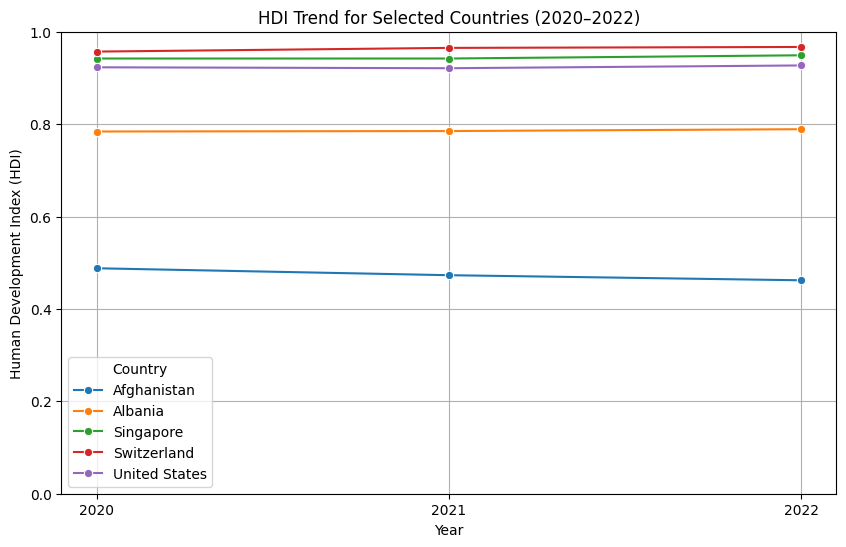

In [74]:
'''
Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.'''

import matplotlib.pyplot as plt
import seaborn as sns

selected_countries = ['Afghanistan', 'Albania', 'Switzerland', 'United States', 'Singapore']

df_selected = df_2020_22[df_2020_22['country'].isin(selected_countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_selected, x='year', y='hdi', hue='country', marker='o')

plt.title('HDI Trend for Selected Countries (2020–2022)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.xticks([2020, 2021, 2022])
plt.ylim(0, 1)
plt.legend(title='Country')
plt.grid(True)
plt.show()


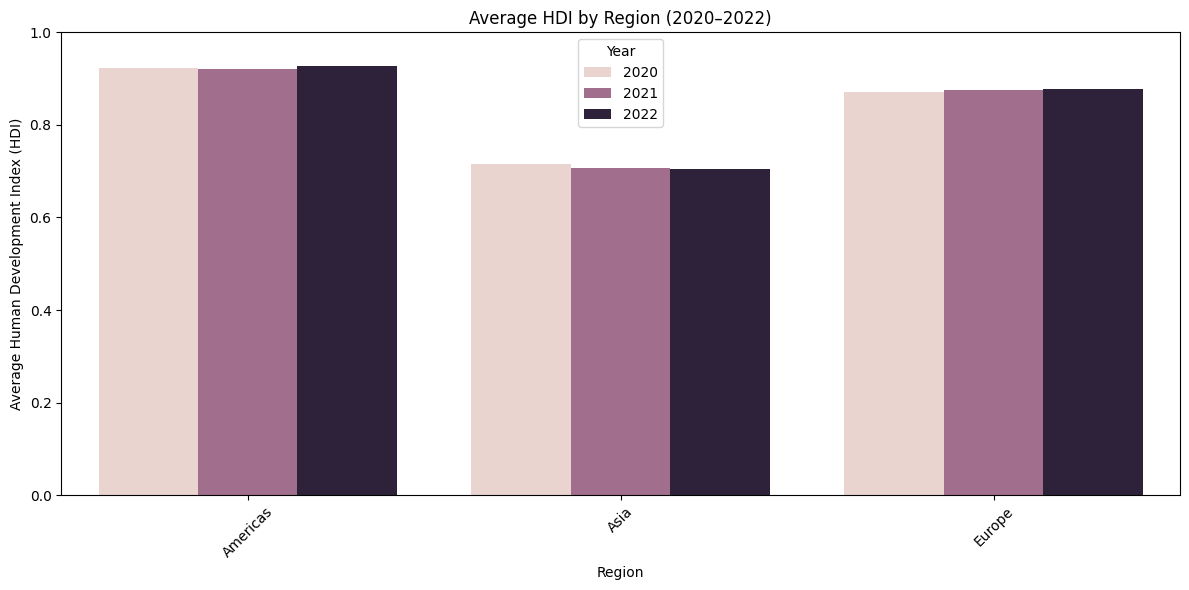

In [75]:
'''
B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.'''


import matplotlib.pyplot as plt
import seaborn as sns

country_to_region = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Switzerland': 'Europe',
    'United States': 'Americas',
    'Singapore': 'Asia',
}

df_2020_22['region'] = df_2020_22['country'].map(country_to_region)
df_2020_22 = df_2020_22.dropna(subset=['region'])

region_hdi = df_2020_22.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_hdi, x='region', y='hdi', hue='year')

plt.title('Average HDI by Region (2020–2022)')
plt.xlabel('Region')
plt.ylabel('Average Human Development Index (HDI)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


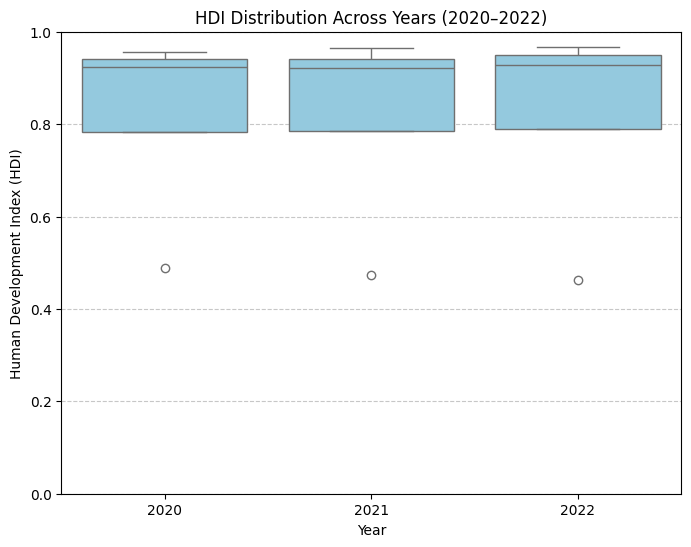

In [76]:
'''
Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.'''

import matplotlib.pyplot as plt
import seaborn as sns

df_years = df_2020_22[df_2020_22['year'].isin([2020, 2021, 2022])]

plt.figure(figsize=(8,6))
sns.boxplot(data=df_years, x='year', y='hdi', color='skyblue')

plt.title('HDI Distribution Across Years (2020–2022)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


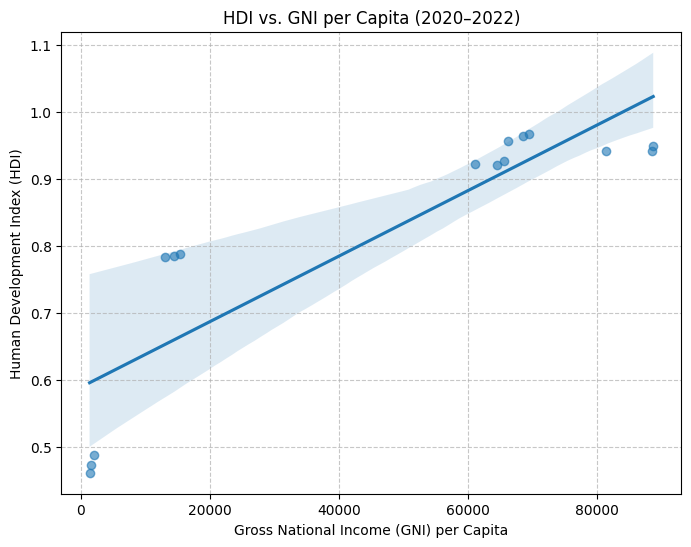

In [77]:
'''Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."'''

import matplotlib.pyplot as plt
import seaborn as sns

if 'gross_inc_percap' in df_2020_22.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(data=df_2020_22, x='gross_inc_percap', y='hdi', scatter_kws={'alpha':0.6})

    plt.title('HDI vs. GNI per Capita (2020–2022)')
    plt.xlabel('Gross National Income (GNI) per Capita')
    plt.ylabel('Human Development Index (HDI)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


In [78]:
'''• Provide brief interpretations of all visualizations, describing major trends, patterns,
and anomalies.
Short Analysis Questions:
• Which countries show the greatest improvement in HDI from 2020 to 2022?'''


df_change = df_2020_22[df_2020_22['year'].isin([2020, 2022])]
df_change = df_change.pivot(index='country', columns='year', values='hdi')
df_change['HDI_change'] = df_change[2022] - df_change[2020]
top_improvers = df_change.sort_values('HDI_change', ascending=False)
top_improvers[['HDI_change']].head(5)

year,HDI_change
country,
Switzerland,0.010
Singapore,0.007
Albania,0.005
United States,0.004
Afghanistan,-0.026


In [79]:
'''
• Did any countries experience a decline in HDI? Provide possible reasons.
'''

decliners = df_change[df_change['HDI_change'] < 0]
decliners[['HDI_change']]


year,HDI_change
country,
Afghanistan,-0.026


In [80]:
'''COVID-19 pandemic impacts on health, life expectancy, and education.

Economic recessions reducing income per capita.

Political instability or conflicts affecting public services and well-being.

• Which region has the highest and lowest average HDI across these three years?
'''

region_avg_hdi = df_2020_22.groupby('region')['hdi'].mean().sort_values()
region_avg_hdi


,hdi
region,
Asia,0.709333
Europe,0.874500
Americas,0.923667


In [81]:
'''Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period'''

'''
The COVID-19 pandemic led to some actual changes in the HDI in 2020 and 2022. Some handful of nations experienced declines as individuals were dying in higher numbers, children were losing education due to school closures,
and has reduced earnings.
There was recovery everywhere. Countries with greater income recovered more rapidly through superior health and assistance plans whereas the poor countries lagged behind. Briefly, the pandemic halted the global human
evolution.'''

'\nThe COVID-19 pandemic led to some actual changes in the HDI in 2020 and 2022. Some handful of nations experienced declines as individuals were dying in higher numbers, children were losing education due to school closures,\nand has reduced earnings.\nThere was recovery everywhere. Countries with greater income recovered more rapidly through superior health and assistance plans whereas the poor countries lagged behind. Briefly, the pandemic halted the global human\nevolution.'

In [82]:
'''**Problem 2**
 Advanced HDI Exploration
 1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.
'''
import pandas as pd
file_path = '/content/sample_data/Human_Development_Index_Dataset.csv'
hdi_df= pd.read_csv(file_path, encoding='latin1')

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

hdi_southasia_df = hdi_df[hdi_df["country"].isin(south_asia_countries)]

hdi_southasia_df.to_csv("HDI_SouthAsia.csv", index=False)

hdi_southasia_df["country"].unique()


array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [83]:
'''
Composite Development Score:
• Create a new metric called Composite Score using the formula:
Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.'''
import pandas as pd
import matplotlib.pyplot as plt

hdi_southasia_df = pd.read_csv("HDI_SouthAsia.csv")

hdi_southasia_df['Composite_Score'] = (
  0.30 * hdi_southasia_df['life_expectancy'] +
  0.30 * hdi_southasia_df['gross_inc_percap']
)

hdi_southasia_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809,948.491234
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264,859.190321
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421,756.683396
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022,532.345729
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948,376.051646


In [84]:
southasia_2022 = hdi_southasia_df[hdi_southasia_df["year"] == 2022]

composite_rank = southasia_2022[["country", "Composite_Score"]].sort_values("Composite_Score", ascending=False)

composite_rank.reset_index(drop=True)


,country,Composite_Score
0,Maldives,5678.289357
1,Sri Lanka,3592.832541
2,Bhutan,3209.130864
3,India,2105.481239
4,Bangladesh,1975.446053
5,Pakistan,1632.210427
6,Nepal,1228.811605
7,Afghanistan,419.425420


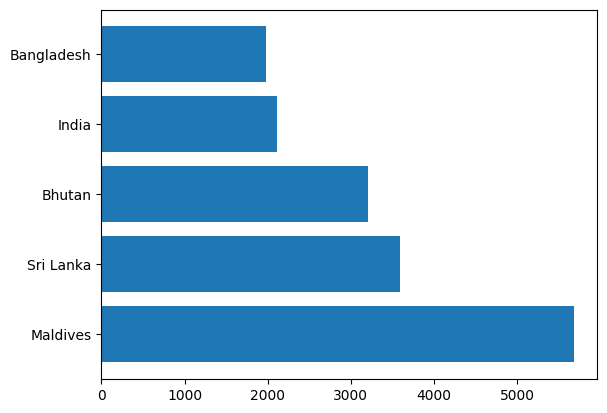

In [85]:
top5 = composite_rank.head(5)

plt.barh(top5["country"], top5["Composite_Score"])
plt.show()


In [86]:
hdi_rank = southasia_2022[["country", "hdi"]].sort_values("hdi", ascending=False)

hdi_rank.reset_index(drop=True)


,country,hdi
0,Sri Lanka,0.780
1,Maldives,0.762
2,Bhutan,0.681
3,Bangladesh,0.670
4,India,0.644
5,Nepal,0.601
6,Pakistan,0.540
7,Afghanistan,0.462


In [87]:
'''Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.'''
southasia_2022 = hdi_southasia_df[hdi_southasia_df['year'] == 2022]

def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[
        (data[column] < Q1 - 1.5 * IQR) |
        (data[column] > Q3 + 1.5 * IQR)
    ]

hdi_outliers = find_outliers(southasia_2022, 'hdi')
gni_outliers = find_outliers(southasia_2022, 'gross_inc_percap')

print("HDI Outliers:")
print(hdi_outliers[['country', 'hdi']])

print("\nGNI per Capita Outliers:")
print(gni_outliers[['country', 'gross_inc_percap']])


HDI Outliers:
Empty DataFrame
Columns: [country, hdi]
Index: []

GNI per Capita Outliers:
Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


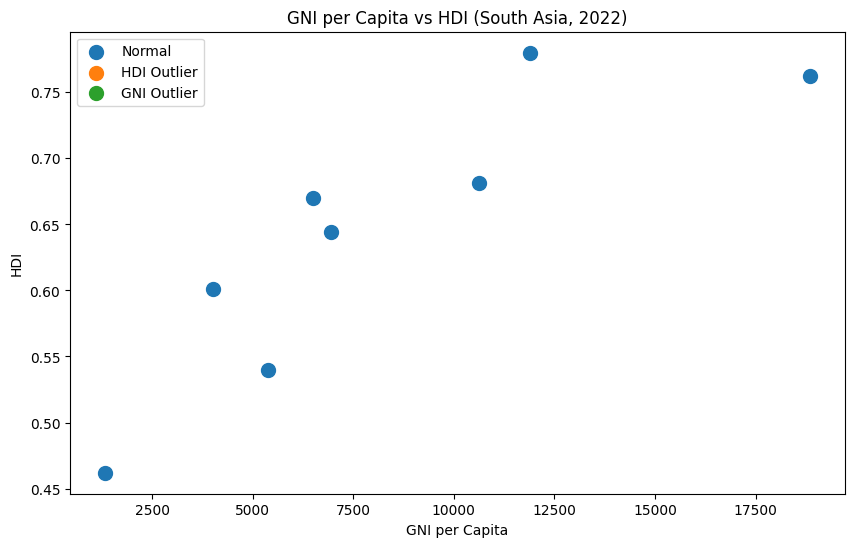

In [88]:
'''• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(southasia_2022['gross_inc_percap'], southasia_2022['hdi'], s=100, label='Normal')
plt.scatter(hdi_outliers['gross_inc_percap'], hdi_outliers['hdi'], s=100, label='HDI Outlier')
plt.scatter(gni_outliers['gross_inc_percap'], gni_outliers['hdi'], s=100, label='GNI Outlier')

plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('GNI per Capita vs HDI (South Asia, 2022)')
plt.legend()
plt.show()


In [89]:
'''• Discuss why the identified countries stand out as outliers.
'''

'• Discuss why the identified countries stand out as outliers.\n'

In [90]:
'''Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender
development"} and Life'''
import pandas as pd

df = pd.read_csv("HDI_SouthAsia.csv", encoding="latin1")

print(df[['hdi', 'gender_development', 'life_expectancy']].head())




     hdi  gender_development  life_expectancy
0  0.284                 NaN           45.967
1  0.292                 NaN           46.663
2  0.299                 NaN           47.596
3  0.307                 NaN           51.466
4  0.300                 NaN           51.495


In [91]:
df_clean = hdi_southasia_df[['hdi', 'gender_development', 'life_expectancy']].dropna()

print("Number of rows after removing NaNs:", len(df_clean))


Number of rows after removing NaNs: 221


In [92]:
corr_gender = df_clean['hdi'].corr(df_clean['gender_development'])
print("HDI & Gender Development: r =", round(corr_gender, 3))

corr_life = df_clean['hdi'].corr(df_clean['life_expectancy'])
print("HDI & Life Expectancy: r =", round(corr_life, 3))

HDI & Gender Development: r = 0.866
HDI & Life Expectancy: r = 0.949


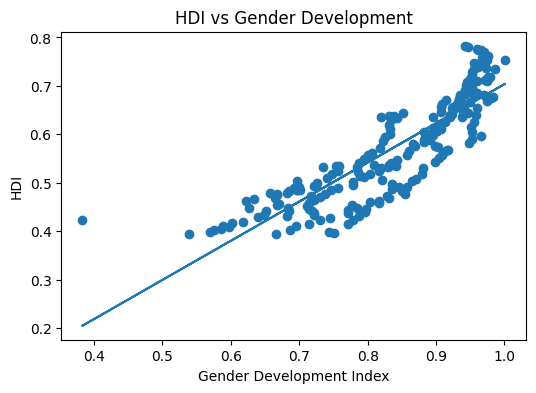

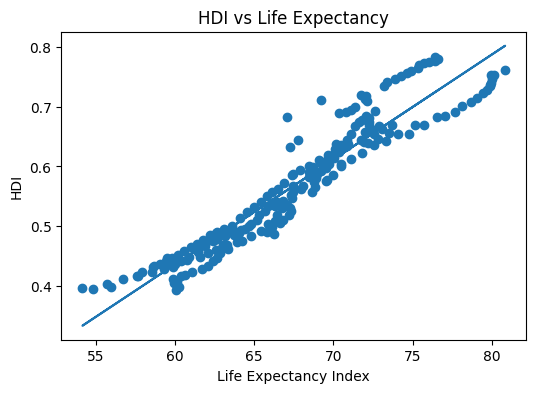

In [93]:
import matplotlib.pyplot as plt
import numpy as np

hdi = df_clean['hdi']
gender_dev = df_clean['gender_development']
life_exp = df_clean['life_expectancy']

plt.figure(figsize=(6, 4))
plt.scatter(gender_dev, hdi)
m, b = np.polyfit(gender_dev, hdi, 1)
plt.plot(gender_dev, m * gender_dev + b)
plt.title('HDI vs Gender Development')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(life_exp, hdi)
m, b = np.polyfit(life_exp, hdi, 1)
plt.plot(life_exp, m * life_exp + b)
plt.title('HDI vs Life Expectancy')
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.show()

In [94]:
'''Gap Analysis:
• Create a new metric:
GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.'''
import pandas as pd

hdi_southasia_df = pd.read_csv("HDI_SouthAsia.csv", encoding='latin1')

print(hdi_southasia_df[['country', 'hdi', 'gross_inc_percap']].head())

hdi_southasia_df['GNI_HDI_Gap'] = hdi_southasia_df['gross_inc_percap'] - hdi_southasia_df['hdi']

print(hdi_southasia_df[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].head())



       country    hdi  gross_inc_percap
0  Afghanistan  0.284       3115.670448
1  Afghanistan  0.292       2817.304736
2  Afghanistan  0.299       2474.681985
3  Afghanistan  0.307       1723.019763
4  Afghanistan  0.300       1202.010488
       country  gross_inc_percap    hdi  GNI_HDI_Gap
0  Afghanistan       3115.670448  0.284  3115.386448
1  Afghanistan       2817.304736  0.292  2817.012736
2  Afghanistan       2474.681985  0.299  2474.382985
3  Afghanistan       1723.019763  0.307  1722.712763
4  Afghanistan       1202.010488  0.300  1201.710488


In [95]:
gap_desc = hdi_southasia_df[['country', 'GNI_HDI_Gap']].sort_values(by='GNI_HDI_Gap', ascending=False)
print("Top countries by positive GNI-HDI Gap:")
print(gap_desc.head(3))

gap_asc = hdi_southasia_df[['country', 'GNI_HDI_Gap']].sort_values(by='GNI_HDI_Gap', ascending=True)
print("\nTop countries by negative GNI-HDI Gap:")
print(gap_asc.head(3))

Top countries by positive GNI-HDI Gap:
      country  GNI_HDI_Gap
164  Maldives  18846.03019
161  Maldives  18679.17236
160  Maldives  18054.97765

Top countries by negative GNI-HDI Gap:
        country  GNI_HDI_Gap
11  Afghanistan   980.789554
10  Afghanistan  1047.002686
9   Afghanistan  1121.985570


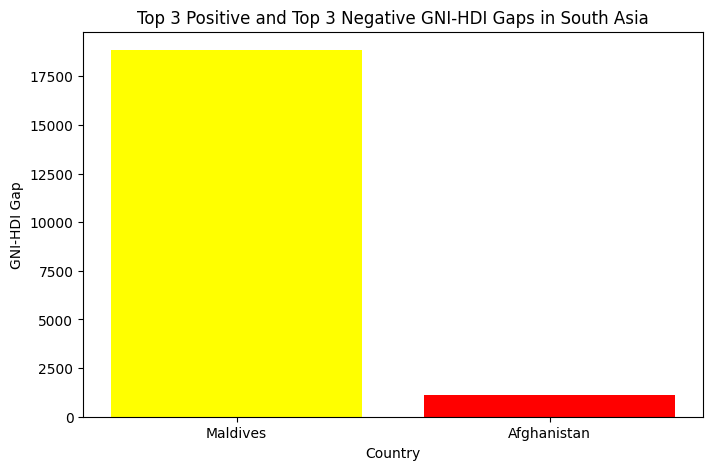

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)
top_gaps = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8, 5))
plt.bar(top_gaps['country'], top_gaps['GNI_HDI_Gap'], color=['yellow']*3 + ['red']*3)
plt.title('Top 3 Positive and Top 3 Negative GNI-HDI Gaps in South Asia')
plt.ylabel('GNI-HDI Gap')
plt.xlabel('Country')
plt.show()


In [97]:
'''**Problem 3 Comparative Regional Analysis: South Asia vs Middle East**
Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.'''

import pandas as pd

df = pd.read_csv("HDI_problem1B.csv")


In [98]:
middle_east = [
    "Bahrain", "Iran (Islamic Republic of)", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine, State of", "Qatar", "Saudi Arabia", "Syrian Arab Republic",
    "United Arab Emirates", "Yemen"
]

In [99]:
south_asia = [
    "Afghanistan","Bangladesh","Bhutan","India","Maldives",
    "Nepal","Pakistan","Sri Lanka"
]

In [100]:
df_2020_2022 = df[df["year"].between(2020, 2022)]


In [101]:
south_asia_subset = df_2020_2022[df_2020_2022["country"].isin(south_asia)]
middle_east_subset = df_2020_2022[df_2020_2022["country"].isin(middle_east)]


In [102]:
south_asia_subset.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_subset.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


In [103]:
'''Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.'''
import pandas as pd

south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

south_mean = south_asia["hdi"].mean()
middle_mean = middle_east["hdi"].mean()

south_std = south_asia["hdi"].std()
middle_std = middle_east["hdi"].std()

print("South Asia Mean HDI (2020-2022):", round(south_mean, 4))
print("Middle East Mean HDI (2020-2022):", round(middle_mean, 4))

print("South Asia HDI Std Dev:", round(south_std, 4))
print("Middle East HDI Std Dev:", round(middle_std, 4))

if middle_mean > south_mean:
    print("Middle East performs better on average.")
else:
    print("South Asia performs better on average.")


South Asia Mean HDI (2020-2022): 0.6396
Middle East Mean HDI (2020-2022): 0.7665
South Asia HDI Std Dev: 0.0983
Middle East HDI Std Dev: 0.1391
Middle East performs better on average.


In [104]:
'''In terms of descriptive statistics, the data reveals a clear regional
divide. The Middle East boasts a considerably higher average
Human Development Index (HDI) score of 0.7889, compared to South Asia's
0.6396. This suggests that, on average, standards of health, education,
and income are markedly better across the Middle Eastern countries for
2022.

However, this regional advantage comes with greater internal disparity.
The Middle East also shows a higher standard deviation (0.1413) than
South Asia's (0.0983). This indicates that while the Middle East
achieves a higher overall level of development, the outcomes are more
unevenly distributed among its nations—ranging from very high
development to more moderate levels. In contrast, South Asian countries
cluster more tightly around their regional mean, but at a consistently
lower tier of development'''

"In terms of descriptive statistics, the data reveals a clear regional\ndivide. The Middle East boasts a considerably higher average\nHuman Development Index (HDI) score of 0.7889, compared to South Asia's\n0.6396. This suggests that, on average, standards of health, education,\nand income are markedly better across the Middle Eastern countries for\n2022.\n\nHowever, this regional advantage comes with greater internal disparity.\nThe Middle East also shows a higher standard deviation (0.1413) than\nSouth Asia's (0.0983). This indicates that while the Middle East\nachieves a higher overall level of development, the outcomes are more\nunevenly distributed among its nations—ranging from very high\ndevelopment to more moderate levels. In contrast, South Asian countries\ncluster more tightly around their regional mean, but at a consistently\nlower tier of development"

In [105]:
'''Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across
the two regions.

Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across
the two regions.'''
import pandas as pd

south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

south_group = south_asia.groupby("country")["hdi"].mean().sort_values(ascending=False)
south_top3 = south_group.head(3)
south_bottom3 = south_group.tail(3)

print("Top 3 South Asia Countries:\n", south_top3)
print("\nBottom 3 South Asia Countries:\n", south_bottom3)

middle_group = middle_east.groupby("country")["hdi"].mean().sort_values(ascending=False)
middle_top3 = middle_group.head(3)
middle_bottom3 = middle_group.tail(3)

print("\nTop 3 Middle East Countries:\n", middle_top3)
print("\nBottom 3 Middle East Countries:\n", middle_bottom3)


Top 3 South Asia Countries:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

Bottom 3 South Asia Countries:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Top 3 Middle East Countries:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Bottom 3 Middle East Countries:
 country
Iraq                    0.667000
Syrian Arab Republic    0.558667
Yemen                   0.426333
Name: hdi, dtype: float64


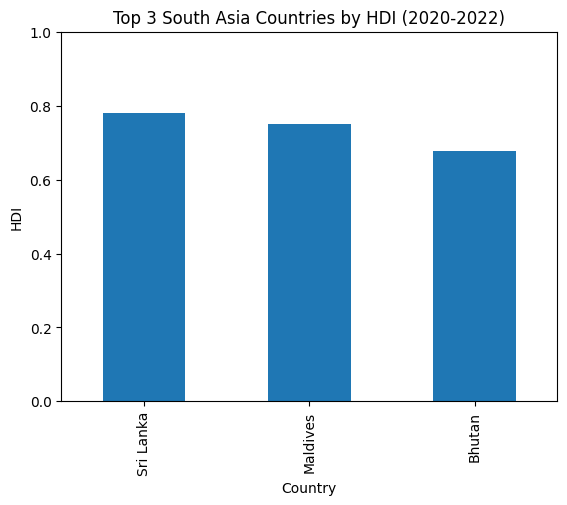

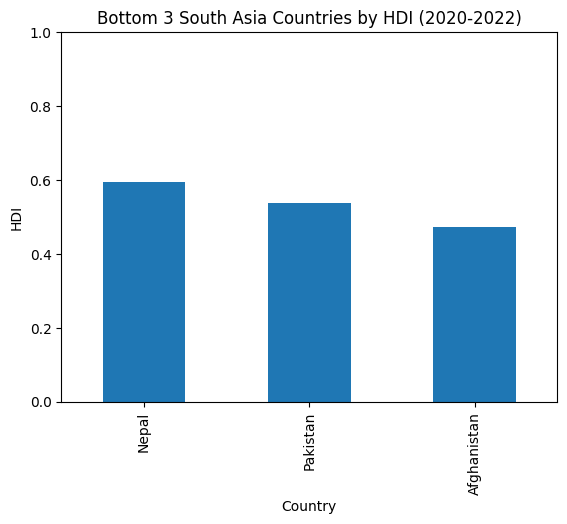

In [106]:
import matplotlib.pyplot as plt

south_top3.plot(kind="bar")
plt.title("Top 3 South Asia Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0, 1)
plt.show()

south_bottom3.plot(kind="bar")
plt.title("Bottom 3 South Asia Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0, 1)
plt.show()


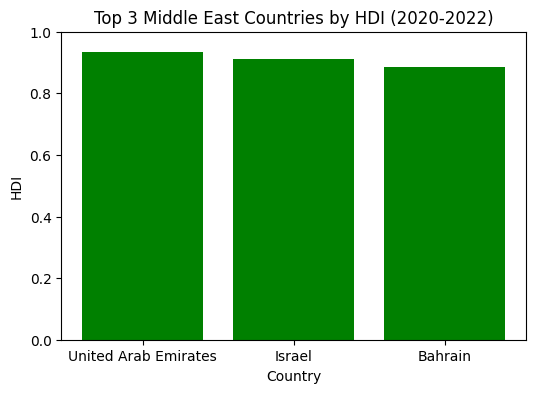

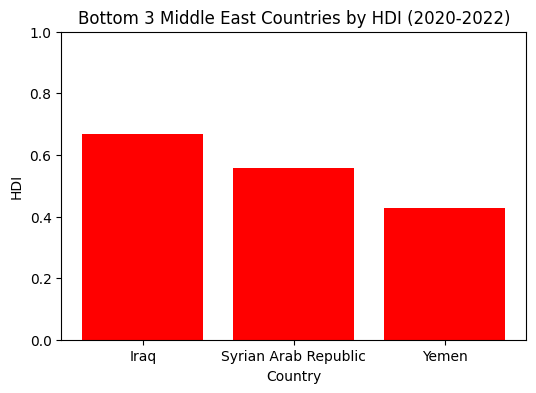

In [107]:
import matplotlib.pyplot as plt

top_order = ["United Arab Emirates", "Israel", "Bahrain"]
bottom_order = ["Iraq", "Syrian Arab Republic", "Yemen"]

plt.figure(figsize=(6,4))
plt.bar(top_order, middle_top3[top_order].values, color='green')
plt.title("Top 3 Middle East Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(bottom_order, middle_bottom3[bottom_order].values, color='red')
plt.title("Bottom 3 Middle East Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0, 1)
plt.show()